# Geospatial Analysis

by: Blaise Andrei Geronimo

In [1]:
# Add python libraries as needed
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Population and Migration

In [2]:
gdf = gpd.read_file("data/regions.0.1.json")
gdf

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,53.623477,1.050272,Autonomous Region in Muslim Mindanao,PH150000000,,ARMM,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((119.46876 4.5936, 119.46907 4...."
1,8.027454,1.546712,Cordillera Administrative Region,PH140000000,,CAR,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"POLYGON ((120.76897 16.19803, 120.76891 16.198..."
2,2.320234,0.050216,National Capital Region,PH130000000,,NCR,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"POLYGON ((121.09951 14.76921, 121.09944 14.769..."
3,11.231749,1.055027,Negros Island Region,PH180000000,,NIR,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((123.27039 9.0846, 123.27073 9...."
4,14.995101,1.043983,Region I,PH010000000,,Ilocos Region,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((119.8661 15.81258, 119.86389 1..."
5,19.139048,2.241812,Region II,PH020000000,,Cagayan Valley,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((122.46667 16.92135, 122.46706 ..."
6,15.949562,1.793513,Region III,PH030000000,,Central Luzon,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((120.11687 14.76309, 120.11699 ..."
7,27.624115,1.326710,Region IV-A,PH040000000,,Calabarzon,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((122.72165 13.36485, 122.72194 ..."
8,78.804735,2.220374,Region IV-B,PH170000000,,Mimaropa,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((117.3126 7.50671, 117.31233 7...."
9,23.181751,1.196677,Region IX,PH090000000,,Zamboanga Peninsula,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((121.88379 6.69138, 121.88393 6..."


In [3]:
pop = pd.read_csv('data/population_by_location.csv', encoding='latin-1')
pop

,"Total population by geographic location (based on 2000, 2010 and 2015 Censuses)",Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,2010.0,2015.0
2,PHILIPPINES,92337852.0,100981437.0
3,..National Capital Region (NCR),11855975.0,12877253.0
4,....City of Manila,1652171.0,1780148.0
...,...,...,...
162,NaN,NaN,NaN
163,NaN,NaN,NaN
164,NaN,NaN,NaN
165,Internal reference code:,NaN,NaN


In [4]:
pop = pop.rename(columns={'Total population by geographic location (based on 2000, 2010 and 2015 Censuses)': 'Region', 
                          'Unnamed: 1': '2010', 'Unnamed: 2' :'2015'})

pop = pop[3:138]
pop

,Region,2010,2015
3,..National Capital Region (NCR),11855975.0,12877253.0
4,....City of Manila,1652171.0,1780148.0
5,....City of Mandaluyong,328699.0,386276.0
6,....City of Marikina,424150.0,450741.0
7,....City of Pasig,669773.0,755300.0
...,...,...,...
133,....Butuan City,309709.0,337063.0
134,....Agusan Del Sur,656418.0,700653.0
135,....Surigao Del Norte,442588.0,485088.0
136,....Surigao Del Sur,561219.0,592250.0


In [5]:
regions = gdf['ADM1ALT1EN'].unique()
regions

array(['ARMM', 'CAR', 'NCR', 'NIR', 'Ilocos Region', 'Cagayan Valley',
       'Central Luzon', 'Calabarzon', 'Mimaropa', 'Zamboanga Peninsula',
       'Bicol Region', 'Western Visayas', 'Central Visayas',
       'Eastern Visayas', 'Northern Mindanao', 'Davao Region',
       'Soccsksargen', 'Caraga'], dtype=object)

In [6]:
pop = pop[pop['Region'].str.lower().str.contains('|'.join(region.lower() for region in regions))]
pop = pop.reset_index().drop('index', axis = 1)
pop['Region'] = pop['Region'].str.lstrip('.')
pop

,Region,2010,2015
0,National Capital Region (NCR),11855975.0,12877253.0
1,Cordillera Administrative Region (CAR),1616867.0,1722006.0
2,Region I (Ilocos Region),4748372.0,5026128.0
3,Region II (Cagayan Valley),3229163.0,3451410.0
4,Region III (Central Luzon),10137737.0,11218177.0
5,Region IV-A (Calabarzon),12609803.0,14414774.0
6,Mimaropa Region,2744671.0,2963360.0
7,Region V (Bicol Region),5420411.0,5796989.0
8,Region VI (Western Visayas),4194579.0,4477247.0
9,Region VII (Central Visayas),5513514.0,6041903.0


In [7]:
mapping = {'National Capital Region (NCR)':'NCR', 'Cordillera Administrative Region (CAR)':'CAR', 
          'Region I (Ilocos Region)':'Ilocos Region', 'Region II (Cagayan Valley)':'Cagayan Valley', 
          'Region III (Central Luzon)':'Central Luzon', 'Region IV-A (Calabarzon)':'Calabarzon', 
          'Mimaropa Region':'Mimaropa', 'Region V (Bicol Region)':'Bicol Region', 
          'Region VI (Western Visayas)':'Western Visayas', 'Negros Island Region (NIR)':'NIR', 
          'Region VII (Central Visayas)':'Central Visayas', 'Region VIII (Eastern Visayas)':'Eastern Visayas',
          'Region IX (Zamboanga Peninsula)':'Zamboanga Peninsula', 'Region X (Northern Mindanao)':'Northern Mindanao', 
          'Region XI (Davao Region)':'Davao Region', 'Region XII (SOCCSKSARGEN)':'Soccsksargen', 
           'Autonomous Region In Muslim Mindanao (ARMM)':'ARMM', 'Region XIII (Caraga)':'Caraga'}

pop['Region'] = pop['Region'].replace(mapping)
pop['2010'] = pop['2010'].astype(int)
pop['2015'] = pop['2015'].astype(int)
pop.sort_values(by='2015', ascending=False)

,Region,2010,2015
5,Calabarzon,12609803,14414774
0,NCR,11855975,12877253
4,Central Luzon,10137737,11218177
9,Central Visayas,5513514,6041903
7,Bicol Region,5420411,5796989
2,Ilocos Region,4748372,5026128
14,Davao Region,4468563,4893318
13,Northern Mindanao,4297323,4689302
15,Soccsksargen,4109571,4545276
8,Western Visayas,4194579,4477247


In [8]:
df = pd.merge(gdf, pop, left_on='ADM1ALT1EN', right_on='Region')
df

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,Region,2010,2015
0,53.623477,1.050272,Autonomous Region in Muslim Mindanao,PH150000000,,ARMM,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((119.46876 4.5936, 119.46907 4....",ARMM,3256140,3781387
1,8.027454,1.546712,Cordillera Administrative Region,PH140000000,,CAR,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"POLYGON ((120.76897 16.19803, 120.76891 16.198...",CAR,1616867,1722006
2,2.320234,0.050216,National Capital Region,PH130000000,,NCR,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"POLYGON ((121.09951 14.76921, 121.09944 14.769...",NCR,11855975,12877253
3,11.231749,1.055027,Negros Island Region,PH180000000,,NIR,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((123.27039 9.0846, 123.27073 9....",NIR,4194525,4414131
4,14.995101,1.043983,Region I,PH010000000,,Ilocos Region,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((119.8661 15.81258, 119.86389 1...",Ilocos Region,4748372,5026128
5,19.139048,2.241812,Region II,PH020000000,,Cagayan Valley,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((122.46667 16.92135, 122.46706 ...",Cagayan Valley,3229163,3451410
6,15.949562,1.793513,Region III,PH030000000,,Central Luzon,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((120.11687 14.76309, 120.11699 ...",Central Luzon,10137737,11218177
7,27.624115,1.326710,Region IV-A,PH040000000,,Calabarzon,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((122.72165 13.36485, 122.72194 ...",Calabarzon,12609803,14414774
8,78.804735,2.220374,Region IV-B,PH170000000,,Mimaropa,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((117.3126 7.50671, 117.31233 7....",Mimaropa,2744671,2963360
9,23.181751,1.196677,Region IX,PH090000000,,Zamboanga Peninsula,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((121.88379 6.69138, 121.88393 6...",Zamboanga Peninsula,3407353,3629783


## Total Population by Region (2015)

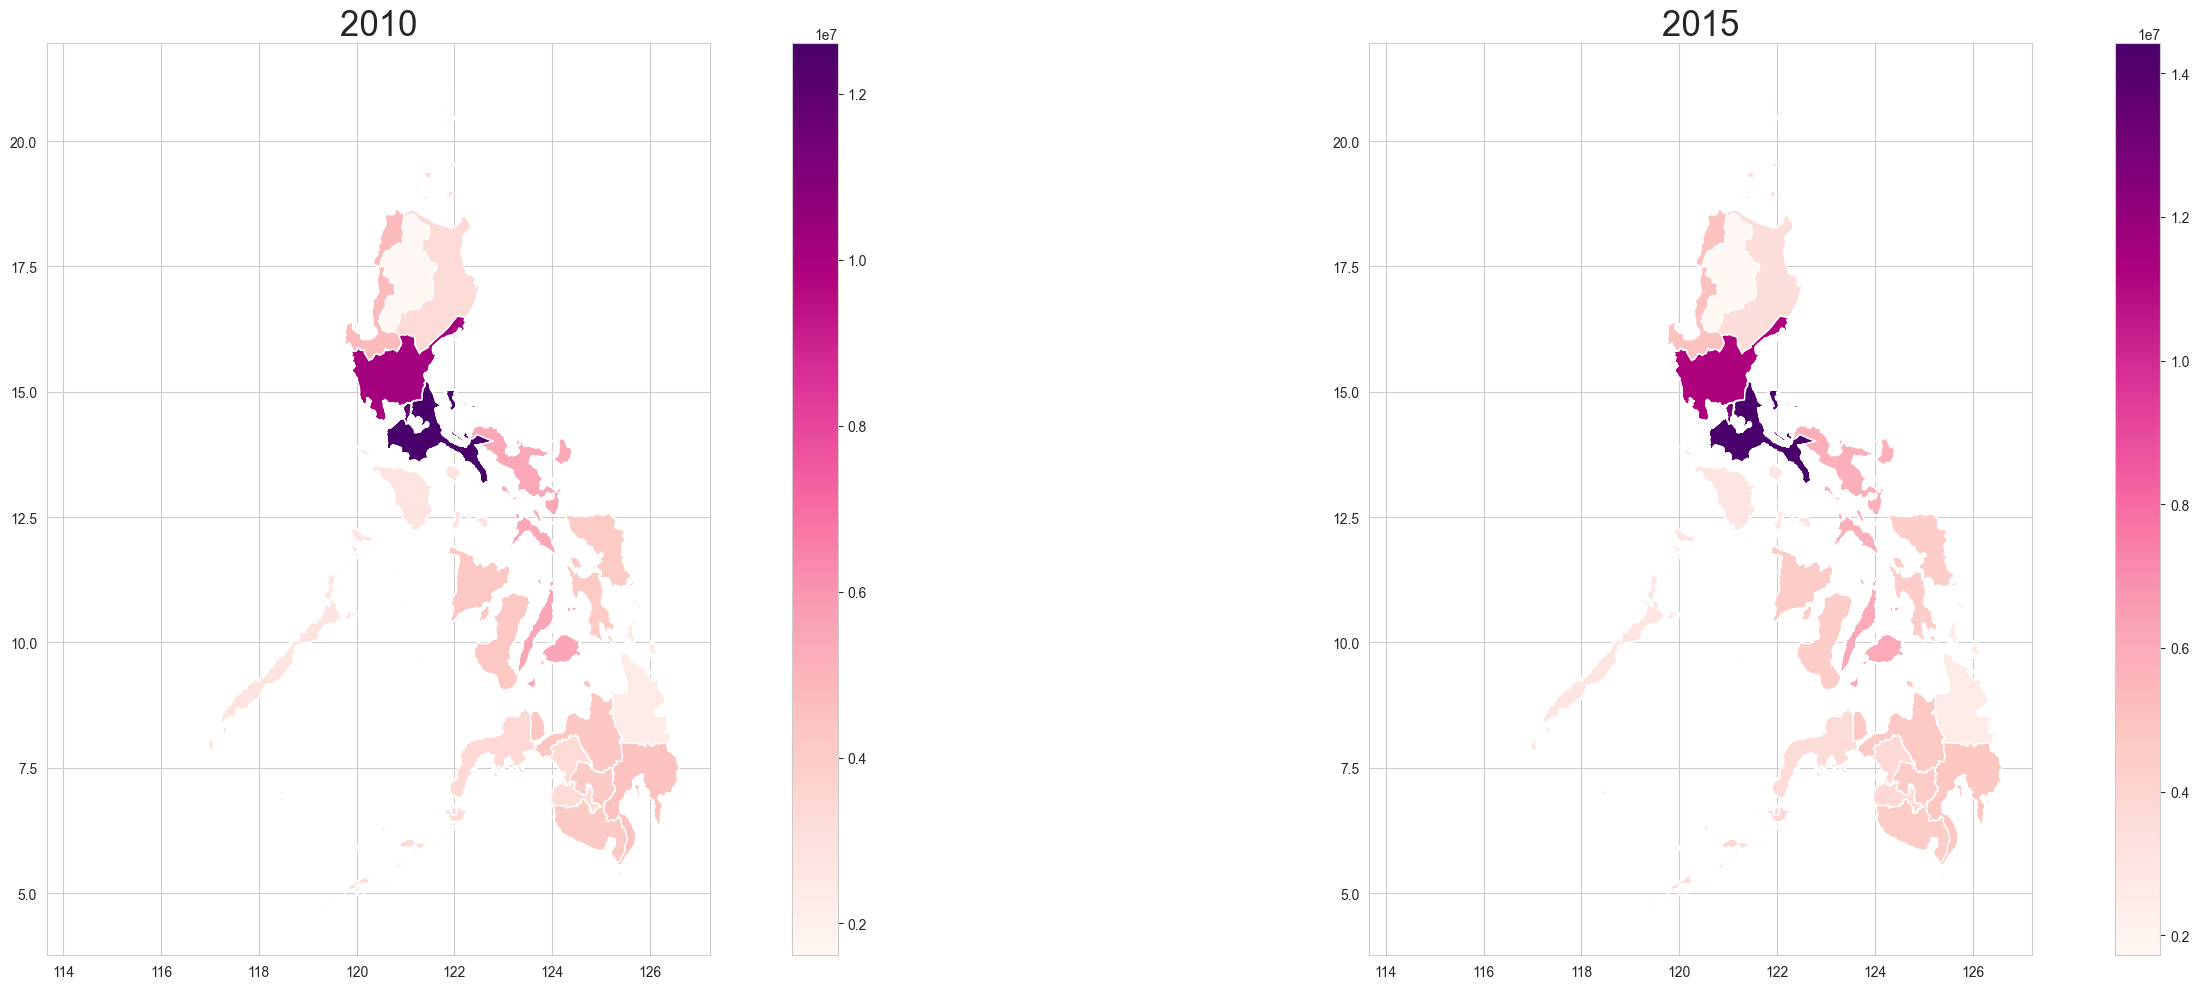

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(30, 10))

# Plot for '2010'
df.plot(column='2010', cmap='RdPu', legend=True, ax=axs[0])
axs[0].set_title('2010', fontsize = 25)

# Plot for '2015'
df.plot(column='2015', cmap='RdPu', legend=True, ax=axs[1])
axs[1].set_title('2015', fontsize = 25)

# Adjust layout
plt.tight_layout()
plt.show()

During the years 2010 and 2015, the regions in the Philippines with the most density tends to be at the CALABARZON region, followed by the NCR and finally Central Luzon. Both CALABARZON and Central Luzon surrounds the National Capital Region which is one of the biggest centers of the economy, which adds up as to why the population tends to be the most dense in this area. 

However, one would expect that most of the population might be the most dense in the national capital region itself. The most probable reason as to why CALABARZON tends to be more populous is that this region tends to be where workers from the NCR reside in. They may go up to the NCR for work but be registered in CALABARZON as their home. 

This may also be the case for the population in central luzon. However, people from the region may have chosen to reside in the NCR instead due to a relatively harder travel compared to the CALABARZON region. Which is why, there may be less volume of people residing in Central Luzon.

For the Visayas Archipelago, Central Visayas seems to be the most populous. A possible reason why this region may be populous is due to the presense of the Cebu Metropolitan area or simply, Metro Cebu, similar to the NCR or 'Metro Manila', Metro Cebu is also one of the economic centers of the country. Meaning, this is where most job opportunities are existing.

Finally, for the Mindanao Archipelago, the Davao Region has the most population density. Similar to Central Visayas which has Metro Cebu, the Davao Region also contains Metro Davao which is also one of the economic centers of the country.

It is apparent that during the 5 year interval, there are no significant changes in the population density throughout the country.

## Labor and Employment

In [10]:
medpay = pd.read_csv('data/median_pay.csv')
medpay

,"Median Monthly Basic Pay and Monthly Allowances of Time-Rate Workers on Full-Time Basis by Region, 2014",Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,2014.0
2,Philippines,Median Basic Pay,11756.0
3,National Capital Region,Median Basic Pay,13748.0
4,Cordillera Administrative Region,Median Basic Pay,7991.0
5,Region I - Ilocos Region,Median Basic Pay,7722.0
6,Region II - Cagayan Valley,Median Basic Pay,9923.0
7,Region III - Central Luzon,Median Basic Pay,9671.0
8,Region IV-A - CALABARZON,Median Basic Pay,9277.0
9,Region IV-B - MIMAROPA,Median Basic Pay,8080.0


In [11]:
medpay = medpay[3:20].reset_index().drop(['index', 'Unnamed: 1'], axis = 1)
medpay = medpay.rename(columns={'Median Monthly Basic Pay and Monthly Allowances of Time-Rate Workers on Full-Time Basis by Region, 2014': 'Region', 
                               'Unnamed: 2':'2014'})
medpay['2014'] = medpay['2014'].astype(int)
medpay

,Region,2014
0,National Capital Region,13748
1,Cordillera Administrative Region,7991
2,Region I - Ilocos Region,7722
3,Region II - Cagayan Valley,9923
4,Region III - Central Luzon,9671
5,Region IV-A - CALABARZON,9277
6,Region IV-B - MIMAROPA,8080
7,Region V- Bicol,7369
8,Region VI - Western Visayas,8762
9,Region VII - Central Visayas,8913


In [12]:
mapping2 = {'National Capital Region':'NCR', 'Cordillera Administrative Region':'CAR', 
          'Region I - Ilocos Region':'Ilocos Region', 'Region II - Cagayan Valley':'Cagayan Valley', 
          'Region III - Central Luzon':'Central Luzon', 'Region IV-A - CALABARZON':'Calabarzon', 
          'Region IV-B - MIMAROPA':'Mimaropa', 'Region V- Bicol':'Bicol Region', 
          'Region VI - Western Visayas':'Western Visayas', 'Negros Island Region (NIR)':'NIR', 
          'Region VII - Central Visayas':'Central Visayas', 'Region VIII - Eastern Visayas':'Eastern Visayas',
          'Region IX - Zamboanga Peninsula':'Zamboanga Peninsula', 'Region X - Northern Mindanao':'Northern Mindanao', 
          'Region XI - Davao':'Davao Region', 'Autonomous Region in Muslim Mindanao':'ARMM', 
          'Region XIII (Caraga)':'Caraga', 'Region XII - SOCCSKSARGEN':'Soccsksargen'}

medpay['Region'] = medpay['Region'].replace(mapping2)
medpay.sort_values(by='2014', ascending=False)

,Region,2014
0,NCR,13748
3,Cagayan Valley,9923
4,Central Luzon,9671
5,Calabarzon,9277
13,Davao Region,8967
9,Central Visayas,8913
8,Western Visayas,8762
12,Northern Mindanao,8431
6,Mimaropa,8080
1,CAR,7991


In [13]:
df2 = pd.merge(gdf, medpay, left_on='ADM1ALT1EN', right_on='Region')
df2

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,Region,2014
0,53.623477,1.050272,Autonomous Region in Muslim Mindanao,PH150000000,,ARMM,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((119.46876 4.5936, 119.46907 4....",ARMM,0
1,8.027454,1.546712,Cordillera Administrative Region,PH140000000,,CAR,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"POLYGON ((120.76897 16.19803, 120.76891 16.198...",CAR,7991
2,2.320234,0.050216,National Capital Region,PH130000000,,NCR,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"POLYGON ((121.09951 14.76921, 121.09944 14.769...",NCR,13748
3,14.995101,1.043983,Region I,PH010000000,,Ilocos Region,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((119.8661 15.81258, 119.86389 1...",Ilocos Region,7722
4,19.139048,2.241812,Region II,PH020000000,,Cagayan Valley,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((122.46667 16.92135, 122.46706 ...",Cagayan Valley,9923
5,15.949562,1.793513,Region III,PH030000000,,Central Luzon,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((120.11687 14.76309, 120.11699 ...",Central Luzon,9671
6,27.624115,1.326710,Region IV-A,PH040000000,,Calabarzon,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((122.72165 13.36485, 122.72194 ...",Calabarzon,9277
7,78.804735,2.220374,Region IV-B,PH170000000,,Mimaropa,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((117.3126 7.50671, 117.31233 7....",Mimaropa,8080
8,23.181751,1.196677,Region IX,PH090000000,,Zamboanga Peninsula,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((121.88379 6.69138, 121.88393 6...",Zamboanga Peninsula,7676
9,44.923244,1.446324,Region V,PH050000000,,Bicol Region,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((122.98823 11.73079, 122.98836 ...",Bicol Region,7369


## Median Basic Pay per region (2014)

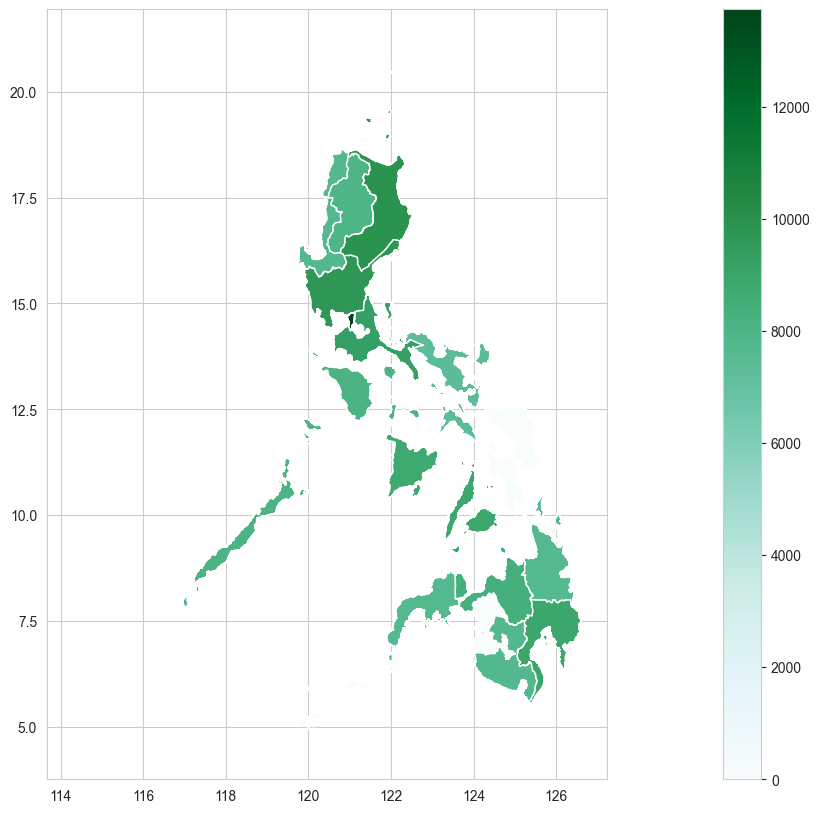

In [14]:
fig, ax = plt.subplots(1,1,figsize=(30,10))
df2.plot(column = "2014", cmap='BuGn', legend=True, ax = ax)
plt.show()

As expected, the National Capital Region (NCR) being the capital economic center of the Philippines, is where the highest median salary is for the whole country. This is due to the presence of different job opportunities ranging from corporate, legal or even hard labor. Due to the range of job opportunities, the salaries earned by the population will both have a high range and variance, which in turn raises the median amount as well. 

The next regions with the top median base pay seem to be the Cagayan Valley, Central Luzon and CALABARZON. One of the biggest reasons why is that these places are either steadily urbanized which is the case for both Central Luzon and CALABARZON, being part of the Greater Manila Area (GMA). Additionally, for both Cagayan valley and Central Luzon, they are part of the top producers for rice which is a highly valued resource in the country (see: https://www.fao.org/3/Y4347E/y4347e1g.htm#:~:text=The%20Central%20Luzon%20and%20Cagayan,areas%20in%20different%20producing%20zones.).

It is worth noting that for Eastern Visayas and the ARMM, there may not be enough data collected and the median salary is not necessarily 0.

## Income and Consumption

In [15]:
rc = pd.read_csv('data/rice_consumption.csv')
rc

,"Annual Per Capita Consumption of Agricultural Commodities by Classification of Barangays, Geolocation, Reference Period and Commodity",Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,2015-2016
2,NaN,NaN,Rice
3,ALL BARANGAYS,PHILIPPINES,109.874
4,NaN,..National Capital Region (NCR),98.464
...,...,...,...
139,NaN,NaN,NaN
140,NaN,NaN,NaN
141,NaN,NaN,NaN
142,Internal reference code:,NaN,NaN


In [16]:
rc = rc.drop(rc.columns[0], axis = 1)

In [17]:
rc = rc.rename(columns={'Unnamed: 1': 'Region', 'Unnamed: 2': '2015-2016'})
rc = rc.dropna()
rc = rc[rc['Region'].str.lower().str.contains('|'.join(region.lower() for region in regions))]
rc = rc.reset_index().drop('index', axis = 1)
rc['Region'] = rc['Region'].str.lstrip('.')
rc['2015-2016'] = rc['2015-2016'].astype(float)
rc

,Region,2015-2016
0,National Capital Region (NCR),98.464
1,Cordillera Administrative Region (CAR),125.530
2,Region I (Ilocos Region),124.831
3,Region II (Cagayan Valley),123.490
4,Region III (Central Luzon),110.964
5,Region IV-A (CALABARZON),95.208
6,MIMAROPA Region,126.312
7,Region V (Bicol Region),115.851
8,Region VI (Western Visayas),123.373
9,Region VII (Central Visayas),80.049


In [18]:
mapping3 = {'National Capital Region (NCR)':'NCR', 'Cordillera Administrative Region (CAR)':'CAR', 
          'Region I (Ilocos Region)':'Ilocos Region', 'Region II (Cagayan Valley)':'Cagayan Valley', 
          'Region III (Central Luzon)':'Central Luzon', 'Region IV-A (CALABARZON)':'Calabarzon', 
          'MIMAROPA Region':'Mimaropa', 'Region V (Bicol Region)':'Bicol Region', 
          'Region VI (Western Visayas)':'Western Visayas', 'Negros Island Region (NIR)':'NIR', 
          'Region VII (Central Visayas)':'Central Visayas', 'Region VIII (Eastern Visayas)':'Eastern Visayas',
          'Region IX (Zamboanga Peninsula)':'Zamboanga Peninsula', 'Region X (Northern Mindanao)':'Northern Mindanao', 
          'Region XI (Davao Region)':'Davao Region', 'Autonomous Region in Muslim Mindanao (ARMM)':'ARMM', 
          'Region XIII (Caraga)':'Caraga', 'Region XII (SOCCSKSARGEN)':'Soccsksargen'}

rc['Region'] = rc['Region'].replace(mapping3)
rc

,Region,2015-2016
0,NCR,98.464
1,CAR,125.530
2,Ilocos Region,124.831
3,Cagayan Valley,123.490
4,Central Luzon,110.964
5,Calabarzon,95.208
6,Mimaropa,126.312
7,Bicol Region,115.851
8,Western Visayas,123.373
9,Central Visayas,80.049


In [19]:
df3 = pd.merge(gdf, rc, left_on='ADM1ALT1EN', right_on='Region')
df3

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,Region,2015-2016
0,53.623477,1.050272,Autonomous Region in Muslim Mindanao,PH150000000,,ARMM,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((119.46876 4.5936, 119.46907 4....",ARMM,139.058
1,8.027454,1.546712,Cordillera Administrative Region,PH140000000,,CAR,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"POLYGON ((120.76897 16.19803, 120.76891 16.198...",CAR,125.530
2,2.320234,0.050216,National Capital Region,PH130000000,,NCR,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"POLYGON ((121.09951 14.76921, 121.09944 14.769...",NCR,98.464
3,14.995101,1.043983,Region I,PH010000000,,Ilocos Region,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((119.8661 15.81258, 119.86389 1...",Ilocos Region,124.831
4,19.139048,2.241812,Region II,PH020000000,,Cagayan Valley,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((122.46667 16.92135, 122.46706 ...",Cagayan Valley,123.490
5,15.949562,1.793513,Region III,PH030000000,,Central Luzon,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((120.11687 14.76309, 120.11699 ...",Central Luzon,110.964
6,27.624115,1.326710,Region IV-A,PH040000000,,Calabarzon,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((122.72165 13.36485, 122.72194 ...",Calabarzon,95.208
7,78.804735,2.220374,Region IV-B,PH170000000,,Mimaropa,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((117.3126 7.50671, 117.31233 7....",Mimaropa,126.312
8,23.181751,1.196677,Region IX,PH090000000,,Zamboanga Peninsula,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((121.88379 6.69138, 121.88393 6...",Zamboanga Peninsula,36.389
9,44.923244,1.446324,Region V,PH050000000,,Bicol Region,,Philippines (the),PH,2016-06-15 00:00:00+00:00,2018-01-30 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((122.98823 11.73079, 122.98836 ...",Bicol Region,115.851


## Rice Consumption Per Region (2015-2016)

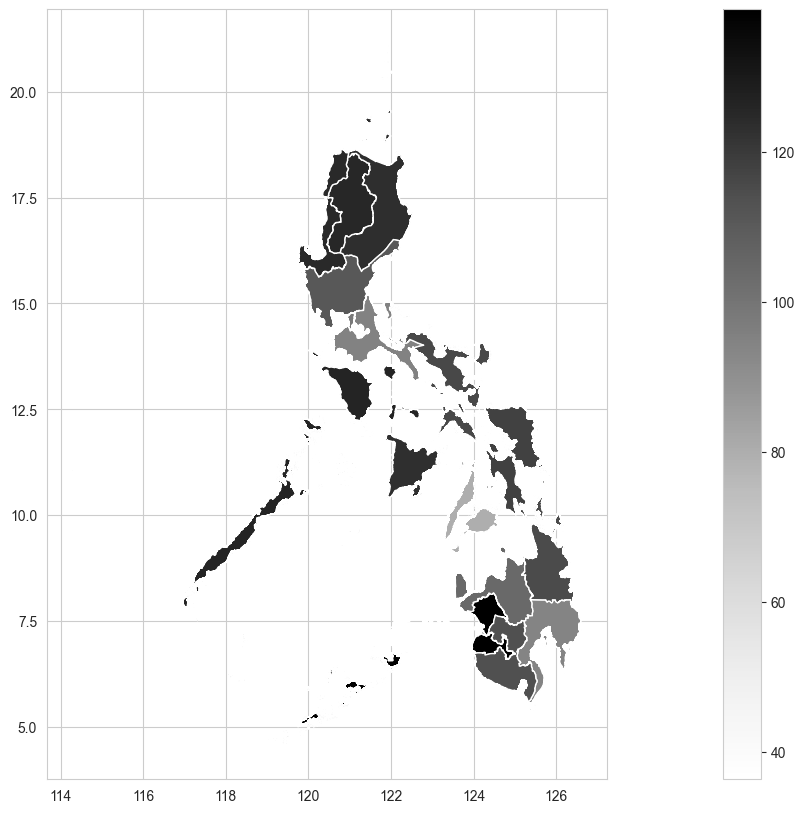

In [20]:
fig, ax = plt.subplots(1,1,figsize=(30,10))
df3.plot(column = "2015-2016", cmap='Greys', legend=True, ax = ax)
plt.show()

What makes this visualization interesting is that, one would expect that the region with the most rice consumption would be the region with the most population density. Through our first visualization, we have discovered that the top 3 regions with the most population are the CALABARZON, NCR and Central Luzon in descending order. 

However, it would be quite surprising that CALABARZON, NCR and Central Luzon are not found to be part of the regions which have the most consumption of rice. The regions found to have the most consumption of rice are: ARMM, MIMAROPA and CAR, Ilocos Region and Cagayan Valley. 

It is also quite an interesting find that the top 2 rice consumers are very reliable rice producers, regardless of their geographic traits which are usually divided into different islands for both the ARMM and MIMAROPA region. (See: https://www.pna.gov.ph/articles/1022669, https://pia.gov.ph/news/2023/09/12/neda-mimaropa-assures-sufficient-supply-of-rice-in-the-region).

While the next top rice consumers are all found in the northern luzon area which is CAR, Ilocos Region and Cagayan Valley. This area in Luzon is composed of land that has rich potential in rice production. Meaning it contains stable plains, which may also be surrounded by mountains for protection against heavy rainfall, whilst also being surrounded by enough irrigation/water to keep crops healthy. 

These locations in comparison to the CALABARZON, NCR and Central Luzon which is steadily becoming urbanized areas, are much stable centers for rice productions.

Overall, the trend seems to be that the regions with high affinity for rice production seems to also be the regions which are top rice consumers. This may also imply that rice in that region is lower priced, which results to higher consumption than other regions which may require travel and add extra cost to the rice.